# Retail Lab (Time Series)

**Learning Objectives:**
  * Apply time series speficic techniques
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [4]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [7]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
390139,48ec39ec085d42fe004d800bfc8b3b9ce1335bd2f9dfb1...,1.0,1.0,ACTIVE,Regularly,18.0,6860c07b7f3959188d0815ef07ebec7aa9348fd5dda0ae...
1244053,e8296c64f89d86b27f8bf60405ab0ba886ea948f210412...,1.0,1.0,ACTIVE,Regularly,39.0,914c52fabc9535758aca1be5c675765bffea52310bcd99...
539858,64c84edb80862859b0b5d6b6b0c7d825074555f15af8e3...,NaN,NaN,ACTIVE,NONE,NaN,f471ecc8b84fa9f1ac91e8af1aafe289e0178e9477b68b...


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [9]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [10]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
1611928,2020-06-28,65a8a28043e5447848d79e6762c29f82e8f54e9521f607...,793185024,0.016932,1
2464236,2020-07-16,868a1134fb24a348aa4025c3a79f05ce82d9ea25f7fd06...,783346001,0.025407,2
2695201,2020-07-22,5c2cdc3b1d58b64b0edcd4072862a2e85715f7e6eb9eb5...,717490008,0.008458,2


In [11]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [12]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [13]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [14]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [15]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [16]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [17]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [18]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [19]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_no               int64  
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_no       int64  
 11  graphical_appearance_name     object 
 12  colour_group_code             int64  
 13  colour_group_name             object 
 14  perceived_colour_value_id     int64  
 15  perceived_colour_value_name   object 
 16  perceived_colour_master_id    int64  
 17  perceived_colour_master_name  object 
 18  department_no         

# 4. Let's set `t_dat` as the Index of the DataFrame
### We also have it sorted

In [20]:
TransactionsAndArticlesAndCustomers['t_dat']=pd.to_datetime(TransactionsAndArticlesAndCustomers['t_dat'])

In [21]:
TransactionsAndArticlesAndCustomers.set_index(TransactionsAndArticlesAndCustomers['t_dat'],inplace=True)

In [22]:
TransactionsAndArticlesAndCustomers.sort_index(inplace=True)

In [23]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
2020-06-01,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


## 4. Let's compute the evolution of sales (first alternative)

In [24]:
SalesWeeklyEvolution=TransactionsAndArticlesAndCustomers.resample('1W')['price'].sum()
SalesWeeklyEvolution

t_dat
2020-06-07     8705.848847
2020-06-14     7571.835390
2020-06-21    11455.089966
2020-06-28    12611.934339
2020-07-05     8609.920966
2020-07-12     6990.395271
2020-07-19     6783.621746
2020-07-26     7222.958898
2020-08-02     7347.934949
2020-08-09     7444.468068
2020-08-16     6922.034881
2020-08-23     6762.291831
2020-08-30     8883.000271
2020-09-06     8554.538339
2020-09-13     9280.541593
2020-09-20     7932.859949
2020-09-27     2273.016475
Freq: W-SUN, Name: price, dtype: float64

<Axes: xlabel='t_dat', ylabel='price'>

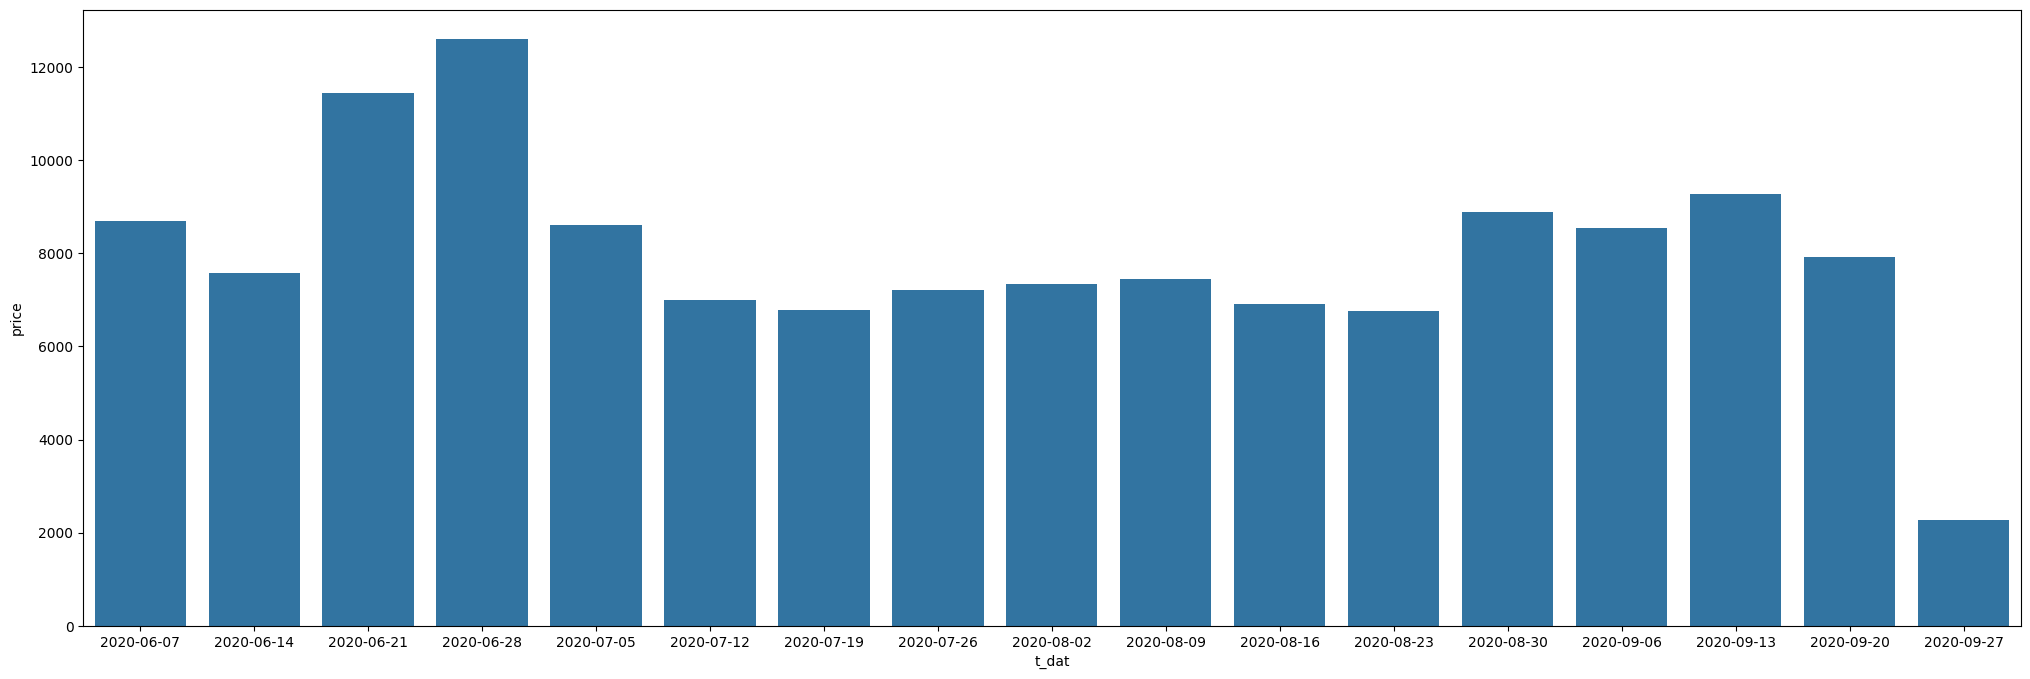

In [25]:
plt.figure(figsize=(25,8))
sns.barplot(SalesWeeklyEvolution)

## 5. Let's compute the evolution of sales (second alternative)

In [26]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
2020-06-01,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [27]:
TransactionsAndArticlesAndCustomers[['price','t_dat']].groupby(pd.Grouper(key='t_dat',freq='1W')).sum()

,price
t_dat,
2020-06-07,8705.848847
2020-06-14,7571.835390
2020-06-21,11455.089966
2020-06-28,12611.934339
2020-07-05,8609.920966
2020-07-12,6990.395271
2020-07-19,6783.621746
2020-07-26,7222.958898
2020-08-02,7347.934949


## 6 . Let's compute the evolution of sales accross sections
### We observe only the top ten sections in terms of total sales

In [28]:
TransactionsAndArticlesAndCustomers.groupby('section_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
section_name,,,,,,,,,,,,,,,,,,,,,
Baby Boy,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,6048,6048,6048,6048,2733,2697,6019,6018,6016,6048
Baby Essentials & Complements,16504,16504,16504,16504,16504,16504,16504,16504,16504,16504,...,16504,16504,16504,16504,6847,6739,16421,16413,16390,16504
Baby Girl,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,...,5482,5482,5482,5482,2743,2685,5458,5456,5445,5482
Boys Underwear & Basics,6105,6105,6105,6105,6105,6105,6105,6105,6105,6105,...,6105,6105,6105,6097,2906,2854,6079,6079,6069,6105
Collaborations,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,791,774,1607,1610,1602,1611
Contemporary Casual,30348,30348,30348,30348,30348,30348,30348,30348,30348,30348,...,30348,30348,30348,30348,14000,13820,30322,30283,30223,30348
Contemporary Smart,46340,46340,46340,46340,46340,46340,46340,46340,46340,46340,...,46340,46340,46340,46340,21878,21607,46290,46232,46158,46340
Contemporary Street,28180,28180,28180,28180,28180,28180,28180,28180,28180,28180,...,28180,28180,28180,28180,13643,13410,28155,28113,28079,28180
Denim Men,26376,26376,26376,26376,26376,26376,26376,26376,26376,26376,...,26376,26376,26376,26376,12262,12113,26351,26338,26264,26376


In [29]:
TransactionsAndArticlesAndCustomers.groupby('section_name')['price'].sum().sort_values(ascending=False)

section_name
Womens Everyday Collection        26512.127441
Divided Collection                14368.467881
Womens Tailoring                  12734.510153
Womens Swimwear, beachwear        10827.219441
Womens Lingerie                    8090.730153
Ladies Denim                       6793.529407
Ladies H&M Sport                   6275.652593
Womens Casual                      5802.052390
Womens Trend                       4678.023220
Womens Everyday Basics             3938.815373
Divided Basics                     3695.292136
Womens Shoes                       3487.375441
Womens Jackets                     3030.125102
Womens Nightwear, Socks & Tigh     3019.212593
H&M+                               2927.873085
Men Underwear                      2366.321169
Divided Projects                   2021.646458
Mama                               1763.259983
Womens Big accessories             1458.839051
Womens Premium                     1378.944424
Womens Small accessories           1356.946000


In [30]:
Top10SectionsBySales=TransactionsAndArticlesAndCustomers.groupby('section_name')['price'].sum().sort_values(ascending=False).head(10)
Top10SectionsBySales

section_name
Womens Everyday Collection    26512.127441
Divided Collection            14368.467881
Womens Tailoring              12734.510153
Womens Swimwear, beachwear    10827.219441
Womens Lingerie                8090.730153
Ladies Denim                   6793.529407
Ladies H&M Sport               6275.652593
Womens Casual                  5802.052390
Womens Trend                   4678.023220
Womens Everyday Basics         3938.815373
Name: price, dtype: float64

In [31]:
Top10SectionsBySales.index

Index(['Womens Everyday Collection', 'Divided Collection', 'Womens Tailoring',
       'Womens Swimwear, beachwear', 'Womens Lingerie', 'Ladies Denim',
       'Ladies H&M Sport', 'Womens Casual', 'Womens Trend',
       'Womens Everyday Basics'],
      dtype='object', name='section_name')

In [32]:
TransactionsAndArticlesAndCustomersTop10Sections=TransactionsAndArticlesAndCustomers[TransactionsAndArticlesAndCustomers['section_name'].isin(Top10SectionsBySales.index)]

In [33]:
TransactionsAndArticlesAndCustomersTop10Sections.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932,2,869811,OLEANDER LINEN STRAP TOP,253,Vest top,Garment Upper body,...,Womens Casual,1005,Jersey Fancy,Top in slub jersey made from a viscose and lin...,NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407,2,823118,Ginger Top,298,Bikini top,Swimwear,...,"Womens Swimwear, beachwear",1018,Swimwear,"Fully lined, non-wired bikini top with adjusta...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811002,0.016932,2,869811,OLEANDER LINEN STRAP TOP,253,Vest top,Garment Upper body,...,Womens Casual,1005,Jersey Fancy,Top in slub jersey made from a viscose and lin...,NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [34]:
TransactionsAndArticlesAndCustomersTop10Sections[['price','t_dat','section_name']].groupby(['section_name',pd.Grouper(key='t_dat',freq='1M')]).sum()

price
section_name               t_dat                  
Divided Collection         2020-06-30  4239.104746
                           2020-07-31  3395.655034
                           2020-08-31  3531.332576
                           2020-09-30  3202.375525
Ladies Denim               2020-06-30  1924.595000
                           2020-07-31  1608.388017
                           2020-08-31  1707.473322
                           2020-09-30  1553.073068
Ladies H&M Sport           2020-06-30  1372.535390
                           2020-07-31  1688.786407
                           2020-08-31  1779.642966
                           2020-09-30  1434.687831
Womens Casual              2020-06-30  2106.393881
                           2020-07-31  1407.569593
                           2020-08-31  1351.405169
                           2020-09-30   936.683746
Womens Everyday Basics     2020-06-30  1230.663780
                           2020-07-31  1013.490271
                           2020-08-31   962.653610
                           2020-09-30   732.007712
Womens Everyday Collection 2020-06-30  8722.013644
                           2020-07-31  5829.777542
                           2020-08-31  6268.846136
                           2020-09-30  5691.490119
Womens Lingerie            2020-06-30  2571.537593
                           2020-07-31  2228.324864
                           2020-08-31  2109.210576
                           2020-09-30  1181.657119
Womens Swimwear, beachwear 2020-06-30  5277.000712
                           2020-07-31  2890.059525
                           2020-08-31  2377.820661
                           2020-09-30   282.338542
Womens Tailoring           2020-06-30  4153.281966
                           2020-07-31  3083.188593
                           2020-08-31  3078.494000
                           2020-09-30  2419.545593
Womens Trend               2020-06-30  1728.727678
                           2020-07-31  1215.435339
                           2020-08-31  1051.876288
                           2020-09-30   681.983915

In [35]:
MonthlySalesPerTopTenSection=TransactionsAndArticlesAndCustomersTop10Sections[['price','t_dat','section_name']].groupby(['section_name',pd.Grouper(key='t_dat',freq='1W')]).sum().reset_index()
MonthlySalesPerTopTenSection

,section_name,t_dat,price
0,Divided Collection,2020-06-07,805.929814
1,Divided Collection,2020-06-14,763.215169
2,Divided Collection,2020-06-21,1142.829712
3,Divided Collection,2020-06-28,1248.159508
4,Divided Collection,2020-07-05,890.091119
...,...,...,...
165,Womens Trend,2020-08-30,215.120729
166,Womens Trend,2020-09-06,206.225424
167,Womens Trend,2020-09-13,226.790508
168,Womens Trend,2020-09-20,218.291322


[None]

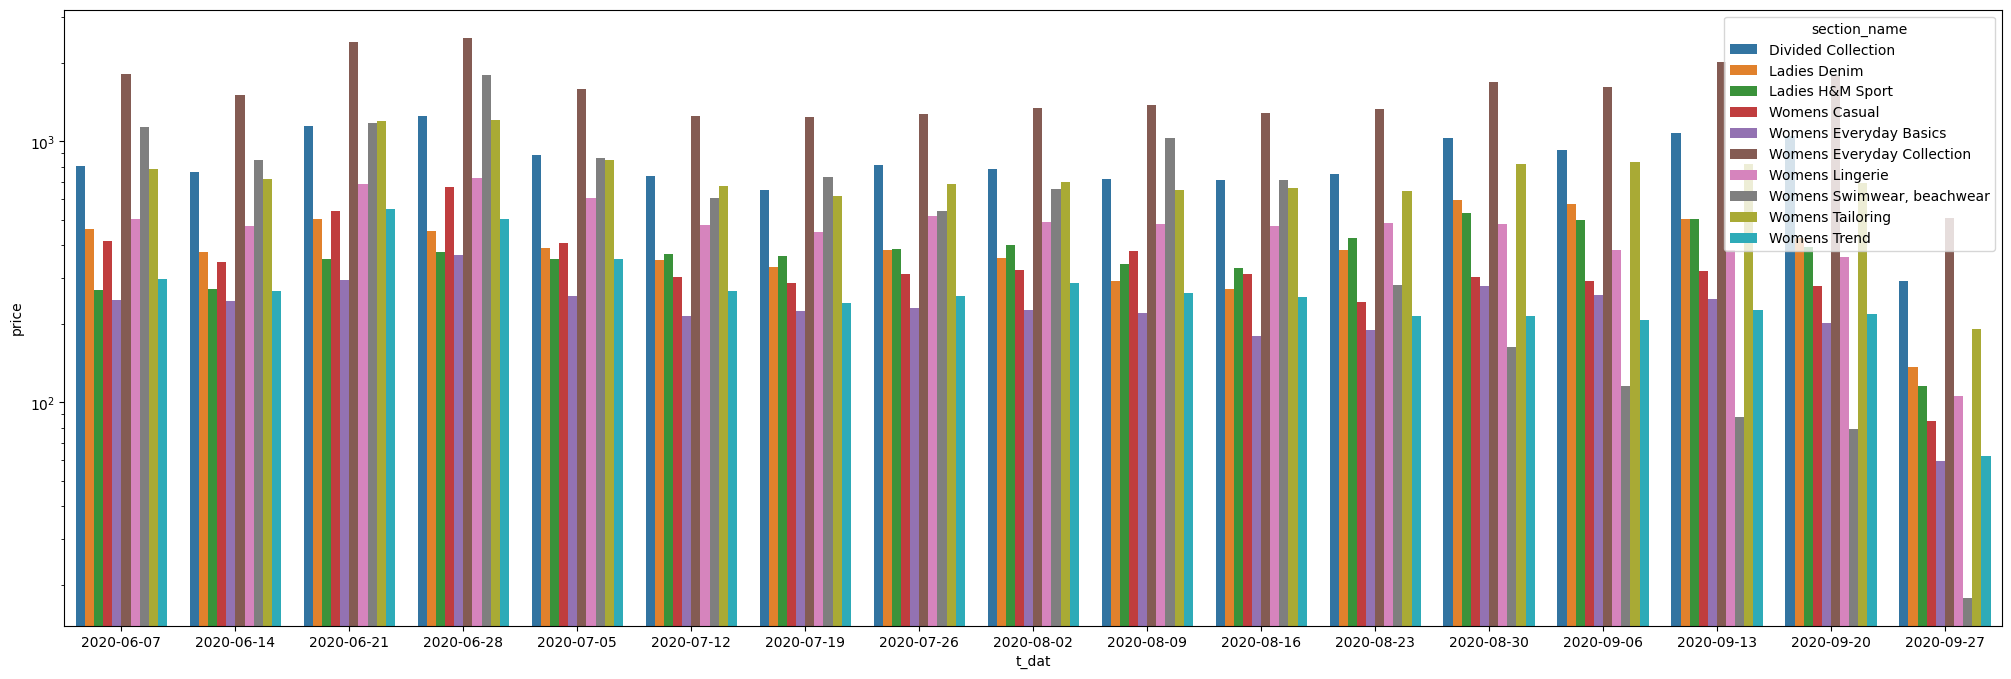

In [36]:
plt.figure(figsize=(25,8))
ax=sns.barplot(data=MonthlySalesPerTopTenSection, x="t_dat", y="price", hue="section_name")
ax.set(yscale='log')

## 7 . Let's compute the evolution of club membership
### We want to determine if active members purchase more often that their non active counterparts

In [37]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
2020-06-01,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2020-06-01,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [38]:
TransactionsAndArticlesAndCustomers.groupby('club_member_status').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,fashion_news_frequency,age,postal_code
club_member_status,,,,,,,,,,,,,,,,,,,,,
ACTIVE,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,...,5082441,5082441,5082441,5082441,5078877,2315032,2281184,5071449,5067537,5082441
LEFT CLUB,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,0,0,559,559,559
PRE-CREATE,61265,61265,61265,61265,61265,61265,61265,61265,61265,61265,...,61265,61265,61265,61265,61217,4518,4325,60629,57269,61265


In [39]:
TransactionsAndArticlesAndCustomers[['t_dat','club_member_status','article_id']].groupby(['club_member_status',pd.Grouper(key='t_dat',freq='1W')]).count()

article_id
club_member_status t_dat                 
ACTIVE             2020-06-07      316666
                   2020-06-14      282369
                   2020-06-21      481292
                   2020-06-28      546788
                   2020-07-05      360232
                   2020-07-12      288855
                   2020-07-19      282253
                   2020-07-26      292399
                   2020-08-02      302233
                   2020-08-09      305754
                   2020-08-16      274235
                   2020-08-23      241230
                   2020-08-30      282778
                   2020-09-06      262926
                   2020-09-13      270435
                   2020-09-20      228056
                   2020-09-27       63940
LEFT CLUB          2020-06-07          41
                   2020-06-14          28
                   2020-06-21          34
                   2020-06-28          45
                   2020-07-05          29
                   2020-07-12          26
                   2020-07-19          38
                   2020-07-26          63
                   2020-08-02          24
                   2020-08-09          36
                   2020-08-16          38
                   2020-08-23          25
                   2020-08-30          32
                   2020-09-06          48
                   2020-09-13          10
                   2020-09-20          34
                   2020-09-27           8
PRE-CREATE         2020-06-07        4129
                   2020-06-14        3322
                   2020-06-21        5372
                   2020-06-28        7811
                   2020-07-05        5053
                   2020-07-12        3743
                   2020-07-19        3201
                   2020-07-26        3322
                   2020-08-02        3333
                   2020-08-09        3608
                   2020-08-16        2662
                   2020-08-23        2934
                   2020-08-30        3252
                   2020-09-06        3069
                   2020-09-13        2749
                   2020-09-20        2760
                   2020-09-27         945

In [40]:
WeeklyTransactionsPerClubMembership=TransactionsAndArticlesAndCustomers[['t_dat','club_member_status','article_id']].groupby(['club_member_status',pd.Grouper(key='t_dat',freq='1W')]).count().reset_index()
WeeklyTransactionsPerClubMembership

,club_member_status,t_dat,article_id
0,ACTIVE,2020-06-07,316666
1,ACTIVE,2020-06-14,282369
2,ACTIVE,2020-06-21,481292
3,ACTIVE,2020-06-28,546788
4,ACTIVE,2020-07-05,360232
5,ACTIVE,2020-07-12,288855
6,ACTIVE,2020-07-19,282253
7,ACTIVE,2020-07-26,292399
8,ACTIVE,2020-08-02,302233
9,ACTIVE,2020-08-09,305754


[None]

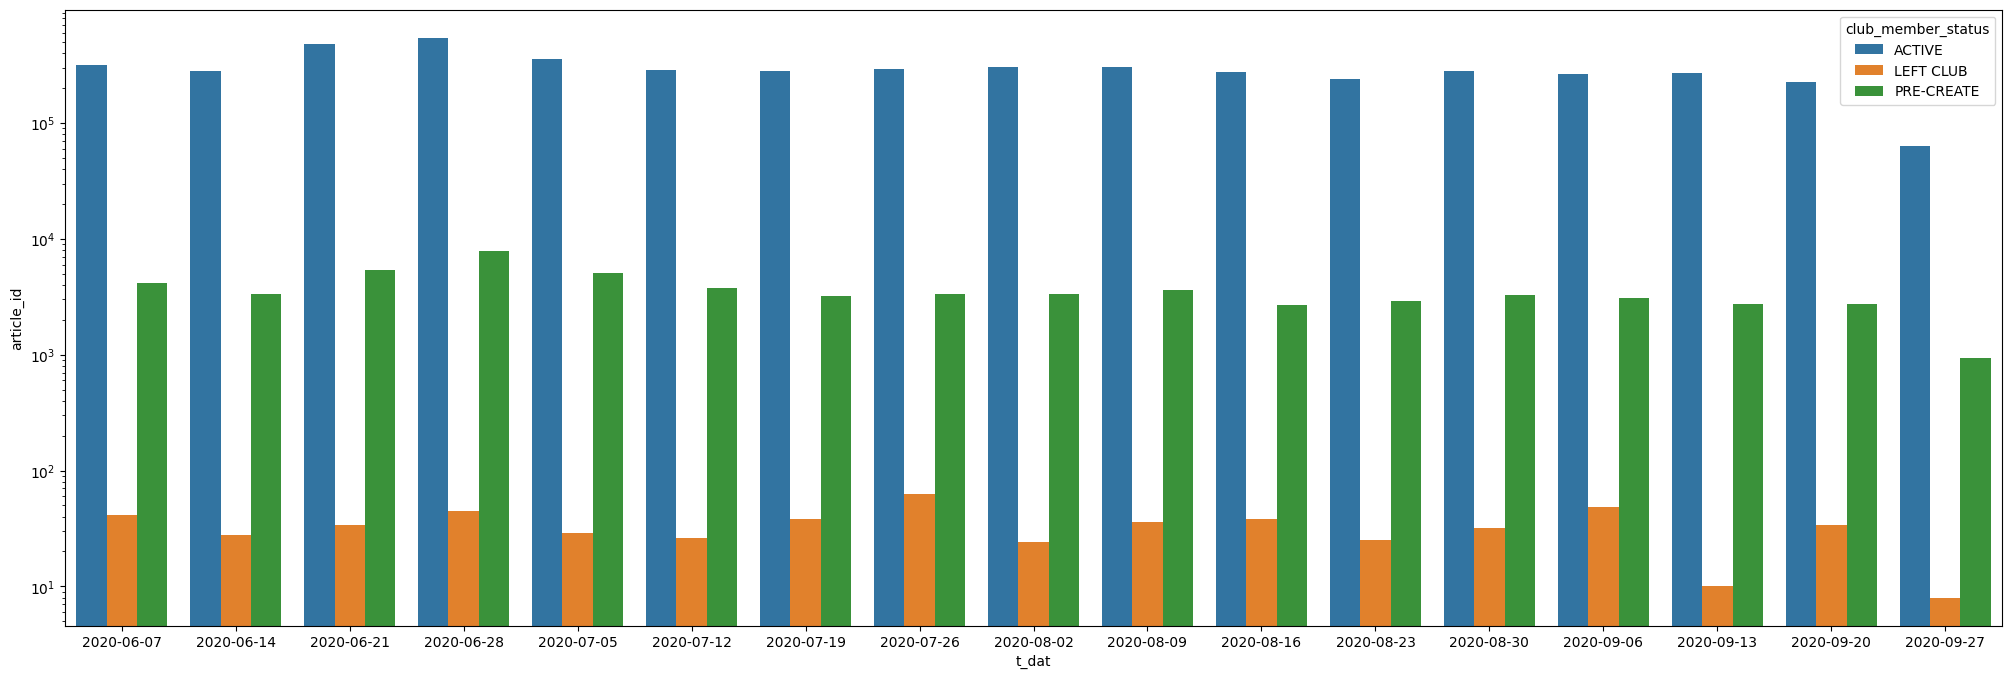

In [41]:
plt.figure(figsize=(25,8))
ax=sns.barplot(data=WeeklyTransactionsPerClubMembership, x="t_dat", y="article_id", hue="club_member_status")
ax.set(yscale='log')